<a href="https://colab.research.google.com/github/anamiqbal95/Credit_Card_Churn_Prediction/blob/main/Final_Credit_Card_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [27]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [28]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [29]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [30]:
new_data = data.iloc[:, :-2]
new_data = new_data.iloc[:, 1:]

Removing variables not required variables

In [31]:
new_data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Exploring Statistics for the data

In [32]:
new_data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Checking for null values in all columns

In [33]:
new_data.isna().sum() 

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Exploratory Data Analysis

## Checking the value counts

In [34]:
new_data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [35]:
new_data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [36]:
new_data['Credit_Limit'].value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

## Plots to check distribution of various columns

array([[<AxesSubplot:title={'center':'Customer_Age'}>]], dtype=object)

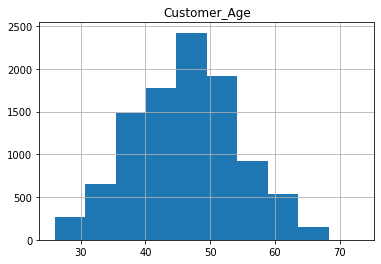

In [37]:
new_data.hist(column='Customer_Age')

array([[<AxesSubplot:title={'center':'Credit_Limit'}>]], dtype=object)

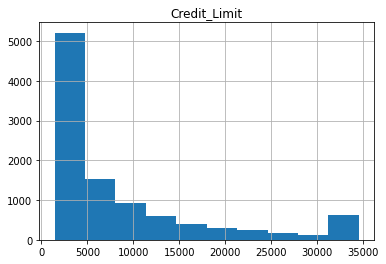

In [38]:
new_data.hist(column='Credit_Limit')

array([[<AxesSubplot:title={'center':'Dependent_count'}>]], dtype=object)

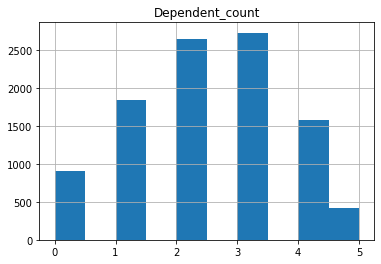

In [39]:
new_data.hist(column='Dependent_count')

In [40]:
fig = px.histogram(new_data, x="Customer_Age")
fig.show()

In [41]:
fig = px.box(new_data, x="Customer_Age", y="Attrition_Flag")
 
fig.show()

In [42]:
fig = px.box(new_data, x="Customer_Age")
 
fig.show()

In [43]:
fig = px.box(new_data, x="Dependent_count")
 
fig.show()

In [44]:
#corr_df = new_data['Gender'].corr(new_data['Income_Category'])
CrosstabResult=pd.crosstab(index=new_data['Gender'],columns=new_data['Income_Category'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 

Income_Category  $120K +  $40K - $60K  ...  Less than $40K  Unknown
Gender                                 ...                         
F                      0         1014  ...            3284     1060
M                    727          776  ...             277       52

[2 rows x 6 columns]


In [45]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=new_data['Customer_Age'],name='Customer Age Box Plot',boxmean=True)
tr2=go.Histogram(x=new_data['Customer_Age'],name='Customer Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

In [46]:
fig = px.pie(new_data, names = "Gender")
fig.show()

In [47]:
fig = px.pie(new_data, names = "Education_Level", title = 'Educational Level')
fig.show()

In [48]:
fig = px.pie(new_data, names = "Card_Category")
fig.show()

The above correlation matrix shows us the correlation and multicollinearity between all variables and highlights the need to remove the following variables as they are highly correlated with one another and will bring a problem of overfitting if not removed. Customer age is positively correlated with months on book. Total transaction amount with total transaction count. Total revolving balance and average utilization ratio. credit limit with average open to buy. avg utilization ratio negatively correlated to average open to buy.

In [49]:
!pip install dython

## Plotting the correlation matrix

<AxesSubplot:xlabel='Gender'>

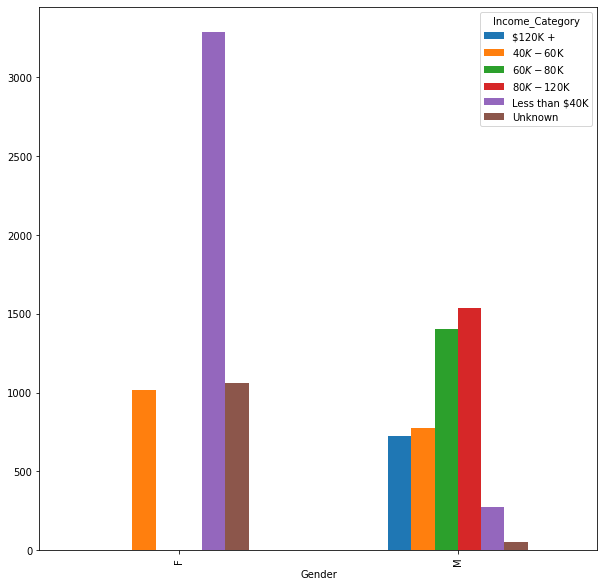

In [50]:
pd.crosstab(new_data['Gender'], new_data['Income_Category']).plot(kind='bar',figsize=(10,10))

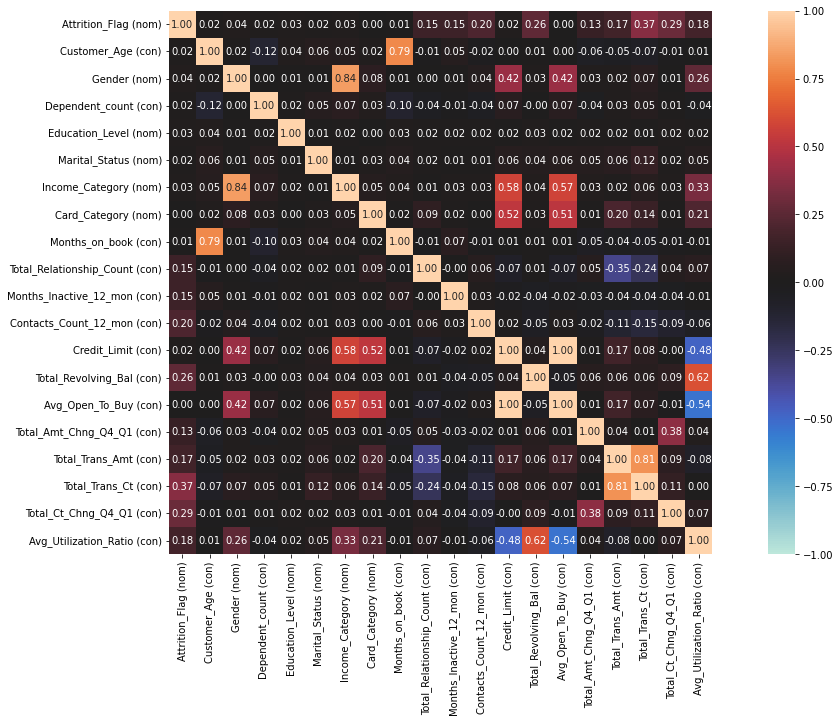

In [51]:
from dython import nominal
nominal.associations(new_data[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']],figsize=(20,10),mark_columns=True);

above correlation also shows categorical

# Feature Engineering

## Label Encoding

First step is to convert string data/columns into categorical, numerical data to be used in ML algorithms. 
The following:
Gender, Education Level, Marital Status, Income Category, Card Category and Attrition Flag.
Carried out Feature importance.

In [52]:
new_data['Gender'] = new_data['Gender'].astype('category')
# Assigning numerical values and storing in another column
new_data['Gender_Cat'] = new_data['Gender'].cat.codes

In [53]:
new_data[['Gender','Gender_Cat']]

,Gender,Gender_Cat
0,M,1
1,F,0
2,M,1
3,F,0
4,M,1
...,...,...
10122,M,1
10123,M,1
10124,F,0
10125,M,1


In [54]:
new_data['Education_Level'] = new_data['Education_Level'].astype('category')
# Assigning numerical values and storing in another column
new_data['Education_Level_Cat'] = new_data['Education_Level'].cat.codes

In [55]:
new_data[['Education_Level','Education_Level_Cat']]

,Education_Level,Education_Level_Cat
0,High School,3
1,Graduate,2
2,Graduate,2
3,High School,3
4,Uneducated,5
...,...,...
10122,Graduate,2
10123,Unknown,6
10124,High School,3
10125,Graduate,2


In [56]:
new_data['Marital_Status'] = new_data['Marital_Status'].astype('category')
# Assigning numerical values and storing in another column
new_data['Marital_Status_Cat'] = new_data['Marital_Status'].cat.codes

In [57]:
new_data[['Marital_Status','Marital_Status_Cat']]

,Marital_Status,Marital_Status_Cat
0,Married,1
1,Single,2
2,Married,1
3,Unknown,3
4,Married,1
...,...,...
10122,Single,2
10123,Divorced,0
10124,Married,1
10125,Unknown,3


In [58]:
new_data['Income_Category'] = new_data['Income_Category'].astype('category')
# Assigning numerical values and storing in another column
new_data['Income_Category_Cat'] = new_data['Income_Category'].cat.codes

In [59]:
new_data[['Income_Category','Income_Category_Cat']]

,Income_Category,Income_Category_Cat
0,$60K - $80K,2
1,Less than $40K,4
2,$80K - $120K,3
3,Less than $40K,4
4,$60K - $80K,2
...,...,...
10122,$40K - $60K,1
10123,$40K - $60K,1
10124,Less than $40K,4
10125,$40K - $60K,1


In [60]:
new_data['Card_Category'] = new_data['Card_Category'].astype('category')
# Assigning numerical values and storing in another column
new_data['Card_Category_Cat'] = new_data['Card_Category'].cat.codes

In [61]:
new_data[['Card_Category','Card_Category_Cat']]

,Card_Category,Card_Category_Cat
0,Blue,0
1,Blue,0
2,Blue,0
3,Blue,0
4,Blue,0
...,...,...
10122,Blue,0
10123,Blue,0
10124,Blue,0
10125,Blue,0


In [62]:
new_data['Attrition_Flag'] = new_data['Attrition_Flag'].astype('category')
# Assigning numerical values and storing in another column
new_data['Attrition_Flag_Cat'] = new_data['Attrition_Flag'].cat.codes
def invert_labels(x):
  if x==0:
    return 1
  else:
    return 0
new_data['Attrition_Flag_Cat'] = new_data['Attrition_Flag_Cat'].map(invert_labels)

In [63]:
new_data[['Attrition_Flag','Attrition_Flag_Cat']]

,Attrition_Flag,Attrition_Flag_Cat
0,Existing Customer,0
1,Existing Customer,0
2,Existing Customer,0
3,Existing Customer,0
4,Existing Customer,0
...,...,...
10122,Existing Customer,0
10123,Attrited Customer,1
10124,Attrited Customer,1
10125,Attrited Customer,1


In [64]:
features_df = new_data[['Attrition_Flag_Cat', 'Customer_Age', 'Gender_Cat', 'Dependent_count',
       'Education_Level_Cat', 'Marital_Status_Cat', 'Income_Category_Cat', 'Card_Category_Cat',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

Randomizing the data

In [65]:
features_df = features_df.sample(frac = 1)

In [66]:
features_df

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4571,0,47,1,2,6,2,3,0,41,6,1,1,2877.0,1136,0.756,4006,68,0.478,0.395
5607,0,58,0,2,3,1,5,0,50,3,2,3,12362.0,0,0.635,4537,72,0.636,0.000
1919,0,47,0,3,3,1,5,0,43,4,3,2,13473.0,1335,0.814,1593,46,0.484,0.099
3858,0,47,0,2,6,3,4,0,36,4,2,2,1738.0,0,1.124,2572,62,0.938,0.000
8683,0,45,1,2,2,1,1,0,36,2,1,3,3735.0,2113,0.684,7059,82,0.577,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,0,45,1,2,2,1,2,0,33,4,3,4,2648.0,2309,1.006,3281,63,0.853,0.872
9034,0,55,0,3,0,2,4,1,35,2,3,3,15987.0,1973,0.705,7345,98,0.463,0.123
2640,0,44,1,4,0,3,0,0,34,5,3,3,8874.0,1590,0.698,1849,56,0.647,0.179
1127,0,49,1,2,6,2,2,0,34,4,1,4,5176.0,0,0.838,1902,56,0.931,0.000


Splitting data into features and output columns

In [67]:
## separating data into input(all columns - attrition) and output(attrition)
X = features_df.iloc[:, 1:]
y = features_df.iloc[:, 0]

In [68]:
y

4571    0
5607    0
1919    0
3858    0
8683    0
       ..
3126    0
9034    0
2640    0
1127    0
3603    0
Name: Attrition_Flag_Cat, Length: 10127, dtype: int64

In [69]:
X

,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4571,47,1,2,6,2,3,0,41,6,1,1,2877.0,1136,0.756,4006,68,0.478,0.395
5607,58,0,2,3,1,5,0,50,3,2,3,12362.0,0,0.635,4537,72,0.636,0.000
1919,47,0,3,3,1,5,0,43,4,3,2,13473.0,1335,0.814,1593,46,0.484,0.099
3858,47,0,2,6,3,4,0,36,4,2,2,1738.0,0,1.124,2572,62,0.938,0.000
8683,45,1,2,2,1,1,0,36,2,1,3,3735.0,2113,0.684,7059,82,0.577,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,45,1,2,2,1,2,0,33,4,3,4,2648.0,2309,1.006,3281,63,0.853,0.872
9034,55,0,3,0,2,4,1,35,2,3,3,15987.0,1973,0.705,7345,98,0.463,0.123
2640,44,1,4,0,3,0,0,34,5,3,3,8874.0,1590,0.698,1849,56,0.647,0.179
1127,49,1,2,6,2,2,0,34,4,1,4,5176.0,0,0.838,1902,56,0.931,0.000


Splitting data into train and test sets.

In [70]:
## creating train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [71]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

Feature: 0, Score: 0.03675
Feature: 1, Score: 0.00323
Feature: 2, Score: 0.00687
Feature: 3, Score: 0.00634
Feature: 4, Score: 0.00657
Feature: 5, Score: 0.00603
Feature: 6, Score: 0.00164
Feature: 7, Score: 0.01537
Feature: 8, Score: 0.09124
Feature: 9, Score: 0.01494
Feature: 10, Score: 0.01916
Feature: 11, Score: 0.02253
Feature: 12, Score: 0.17297
Feature: 13, Score: 0.05523
Feature: 14, Score: 0.15282
Feature: 15, Score: 0.29940
Feature: 16, Score: 0.07569
Feature: 17, Score: 0.01321


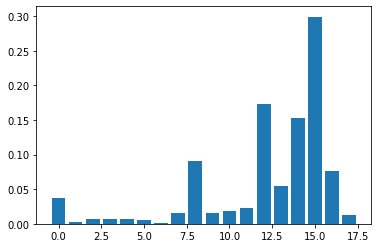

In [72]:
from matplotlib import pyplot
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


# Applying ML Algorithms

Applying ML Algorithms:
Logistic Regression,
SVM,
Multinomial/Gaussian NB, 
RandomForest,
Boosting,
XGBoost,
AdaBoost

In [73]:
import matplotlib.pyplot as plt
import numpy as np

##we are doing binary classification as 0,1

## lOGISTIC REGRESSION works at about 90% accuracy 
## one of the best industry classifier algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
## class class_weight = 'balanced' - balances classes = in our case accuracy decreased
## multi_class = 'ovr'
model_LR = LogisticRegression(solver='liblinear', random_state=0)

In [75]:
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [76]:
model_LR.classes_

array([0, 1])

In [77]:
model_LR.intercept_

array([0.15008355])

In [78]:
model_LR.coef_

array([[ 1.95970710e-02, -1.98360872e-01,  1.71759791e-01,
         7.22731303e-02,  3.61615962e-01,  9.08565354e-02,
         1.21129031e-01, -5.47977890e-03, -3.92809033e-01,
         6.06417078e-01,  6.60673971e-01, -9.15526759e-06,
        -9.07019332e-04, -1.41676506e-01,  4.15319516e-04,
        -1.06440294e-01, -4.78557506e-01,  3.62960440e-02]])

In [79]:
model_LR.predict_proba(X_test)

array([[0.96119115, 0.03880885],
       [0.99761866, 0.00238134],
       [0.97336337, 0.02663663],
       ...,
       [0.97974494, 0.02025506],
       [0.97244173, 0.02755827],
       [0.98004978, 0.01995022]])

In [80]:
y_predict = model_LR.predict(X_test)

In [81]:
model_LR.score(X_test, y_test)

0.8879565646594274

In [82]:
confusion_matrix(y_test, model_LR.predict(X_test))

array([[1632,   50],
       [ 177,  167]])

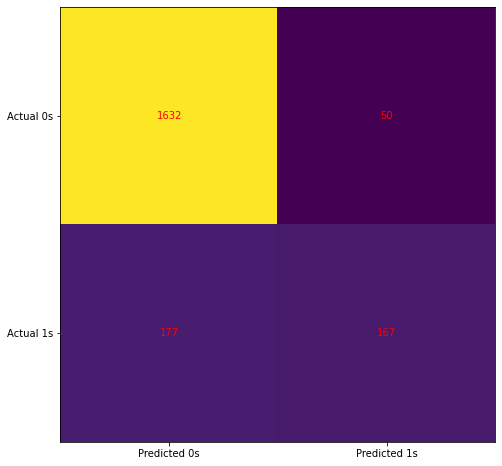

In [83]:
cm = confusion_matrix(y_test, model_LR.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [84]:
from sklearn.metrics import classification_report

In [85]:
##take y_test 10 rows and see actual and predicted, and check precision, recall, f1 score
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1809
           1       0.49      0.77      0.60       217

    accuracy                           0.89      2026
   macro avg       0.73      0.84      0.77      2026
weighted avg       0.92      0.89      0.90      2026



In [86]:
features_df['Attrition_Flag_Cat'].value_counts()

0    8500
1    1627
Name: Attrition_Flag_Cat, dtype: int64

In [87]:
new_data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [88]:
## SVM - did not work for us
## predicted all 1s, no 0 (where 0 is attrited customers)
## zero division error
from sklearn.svm import SVC

In [89]:
clf = SVC (gamma = 'auto')

In [90]:
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [91]:
svm_y_predict = clf.predict(X_test)
print(svm_y_predict)

[0 0 0 ... 0 0 0]


In [92]:
clf.score(X_test, y_test)

0.8302073050345509

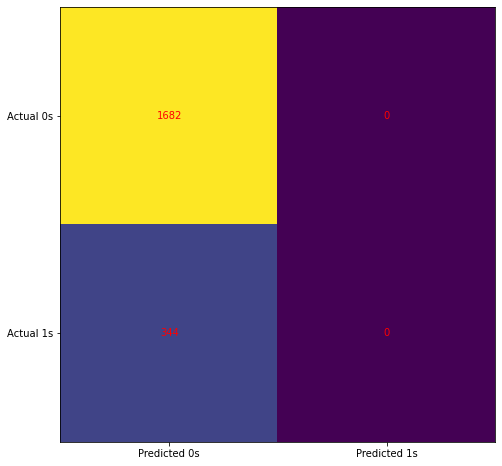

In [93]:
cm = confusion_matrix(y_test, svm_y_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [94]:
print(classification_report(svm_y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2026
           1       0.00      0.00      0.00         0

    accuracy                           0.83      2026
   macro avg       0.50      0.42      0.45      2026
weighted avg       1.00      0.83      0.91      2026



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [95]:
list(set(svm_y_predict))

[0]

In [96]:
import xgboost as xgb

In [97]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [98]:
y_pred_xgb = xgb_model.predict(X_test)

In [99]:
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1682
           1       0.95      0.84      0.90       344

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

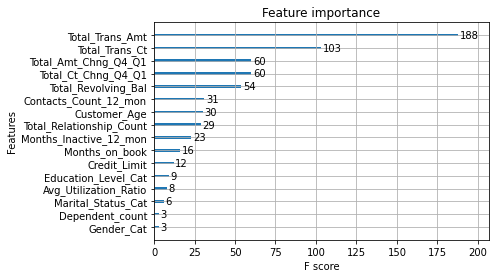

In [101]:
xgb.plot_importance(xgb_model)

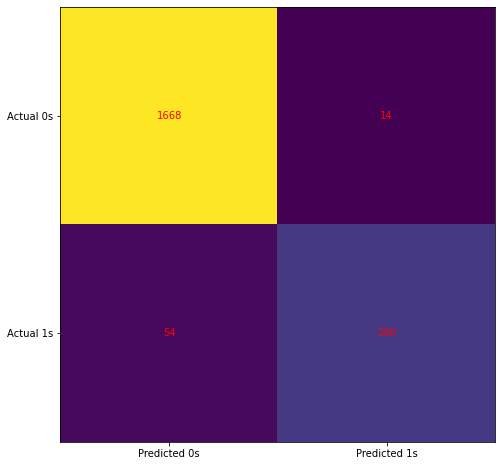

In [102]:
cm = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [105]:
y_pred_ada = clf.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1682
           1       0.91      0.84      0.87       344

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [107]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)

In [108]:
clf_mlp.predict_proba(X_test[:1])

array([[1.00000000e+00, 2.35725843e-83]])

In [109]:
clf_mlp.score(X_test, y_test)

0.8366238894373149

In [110]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1682
           1       0.93      0.04      0.08       344

    accuracy                           0.84      2026
   macro avg       0.88      0.52      0.49      2026
weighted avg       0.85      0.84      0.77      2026



In [111]:
neg_label_rows = features_df[features_df['Attrition_Flag_Cat'] == 0]
pos_label_rows = features_df[features_df['Attrition_Flag_Cat'] == 1]

In [112]:
neg_label_rows

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4571,0,47,1,2,6,2,3,0,41,6,1,1,2877.0,1136,0.756,4006,68,0.478,0.395
5607,0,58,0,2,3,1,5,0,50,3,2,3,12362.0,0,0.635,4537,72,0.636,0.000
1919,0,47,0,3,3,1,5,0,43,4,3,2,13473.0,1335,0.814,1593,46,0.484,0.099
3858,0,47,0,2,6,3,4,0,36,4,2,2,1738.0,0,1.124,2572,62,0.938,0.000
8683,0,45,1,2,2,1,1,0,36,2,1,3,3735.0,2113,0.684,7059,82,0.577,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,0,45,1,2,2,1,2,0,33,4,3,4,2648.0,2309,1.006,3281,63,0.853,0.872
9034,0,55,0,3,0,2,4,1,35,2,3,3,15987.0,1973,0.705,7345,98,0.463,0.123
2640,0,44,1,4,0,3,0,0,34,5,3,3,8874.0,1590,0.698,1849,56,0.647,0.179
1127,0,49,1,2,6,2,2,0,34,4,1,4,5176.0,0,0.838,1902,56,0.931,0.000


In [113]:
pos_label_rows

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
734,1,43,0,4,0,1,4,0,23,6,2,3,7706.0,392,0.764,965,27,0.421,0.051
1721,1,61,1,2,2,1,0,0,49,3,0,4,11374.0,2517,1.015,1088,26,1.167,0.221
8201,1,35,0,3,2,2,4,0,31,1,3,4,1678.0,0,0.676,2475,61,0.694,0.000
9655,1,50,1,2,2,2,3,3,40,3,4,6,34516.0,0,0.801,7661,79,1.079,0.000
5672,1,35,1,3,1,1,3,0,30,5,3,4,13590.0,1528,0.728,2137,52,0.486,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6082,1,54,0,4,3,2,1,0,36,3,3,4,1438.3,0,0.641,2092,42,0.680,0.000
4802,1,53,0,2,5,2,1,0,47,1,2,3,1699.0,0,0.602,2520,49,0.531,0.000
9409,1,34,1,2,3,2,2,0,36,2,3,2,9719.0,2517,0.906,9183,51,0.700,0.259
4505,1,62,0,0,3,3,4,0,51,4,2,3,5210.0,0,0.640,2162,36,0.161,0.000


In [114]:
features_df = pd.concat([pos_label_rows, neg_label_rows[0:2000]])

In [115]:
features_df

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
734,1,43,0,4,0,1,4,0,23,6,2,3,7706.0,392,0.764,965,27,0.421,0.051
1721,1,61,1,2,2,1,0,0,49,3,0,4,11374.0,2517,1.015,1088,26,1.167,0.221
8201,1,35,0,3,2,2,4,0,31,1,3,4,1678.0,0,0.676,2475,61,0.694,0.000
9655,1,50,1,2,2,2,3,3,40,3,4,6,34516.0,0,0.801,7661,79,1.079,0.000
5672,1,35,1,3,1,1,3,0,30,5,3,4,13590.0,1528,0.728,2137,52,0.486,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0,40,1,5,6,3,3,0,22,6,1,4,4042.0,1744,0.582,1471,37,0.542,0.431
2376,0,37,1,1,2,2,2,0,27,4,1,3,4288.0,2349,0.718,2591,57,0.541,0.548
3495,0,48,1,1,6,1,2,0,36,4,1,3,11770.0,1813,0.623,3280,70,0.667,0.154
3916,0,51,1,2,2,1,2,0,32,6,3,4,10824.0,0,0.962,3700,73,0.738,0.000


In [116]:
## separating data into input(all columns - attrition) and output(attrition)
X = features_df.iloc[:, 1:]
y = features_df.iloc[:, 0]

In [117]:
y

734     1
1721    1
8201    1
9655    1
5672    1
       ..
1548    0
2376    0
3495    0
3916    0
7332    0
Name: Attrition_Flag_Cat, Length: 3627, dtype: int64

In [118]:
X

,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
734,43,0,4,0,1,4,0,23,6,2,3,7706.0,392,0.764,965,27,0.421,0.051
1721,61,1,2,2,1,0,0,49,3,0,4,11374.0,2517,1.015,1088,26,1.167,0.221
8201,35,0,3,2,2,4,0,31,1,3,4,1678.0,0,0.676,2475,61,0.694,0.000
9655,50,1,2,2,2,3,3,40,3,4,6,34516.0,0,0.801,7661,79,1.079,0.000
5672,35,1,3,1,1,3,0,30,5,3,4,13590.0,1528,0.728,2137,52,0.486,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,40,1,5,6,3,3,0,22,6,1,4,4042.0,1744,0.582,1471,37,0.542,0.431
2376,37,1,1,2,2,2,0,27,4,1,3,4288.0,2349,0.718,2591,57,0.541,0.548
3495,48,1,1,6,1,2,0,36,4,1,3,11770.0,1813,0.623,3280,70,0.667,0.154
3916,51,1,2,2,1,2,0,32,6,3,4,10824.0,0,0.962,3700,73,0.738,0.000


In [119]:
## creating train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [120]:
import xgboost as xgb

In [121]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [122]:
y_pred_xgb = xgb_model.predict(X_test)

In [123]:
y_pred_xgb

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       382
           1       0.94      0.94      0.94       344

    accuracy                           0.94       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.94      0.94      0.94       726



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

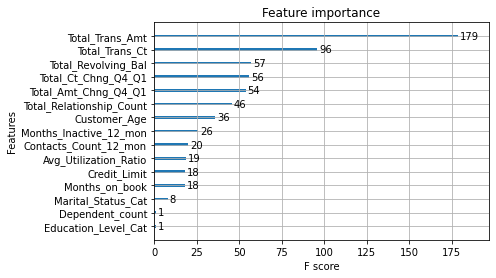

In [125]:
xgb.plot_importance(xgb_model)

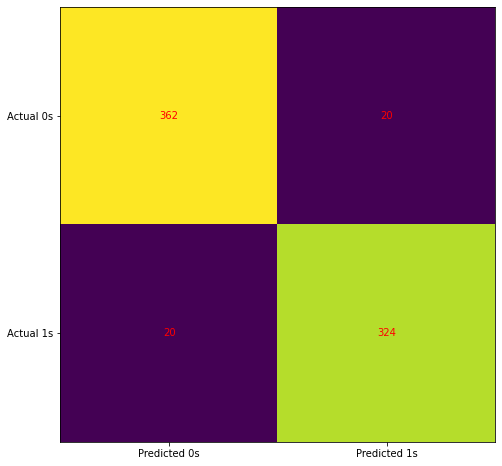

In [126]:
cm = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()